In [15]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [6]:
input_cardiac_record = pd.read_csv("p1.csv")
input_cardiac_record

,time (msec),x axis,y axis,z axis
0,0,1728,-15736,2748
1,10,2928,-15780,1920
2,20,4492,-16188,1340
3,30,2272,-14536,2092
4,40,2700,-16180,2652
5,50,3484,-16400,1640
6,60,3696,-15912,1524
7,70,4076,-15352,1212
8,80,4036,-14228,1212
9,90,3336,-15380,2128


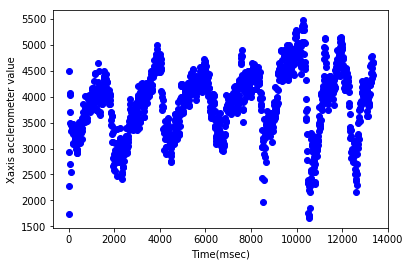

In [39]:
plt.xlabel("Time(msec)")
plt.ylabel("Xaxis acclerometer value")
plt.plot(input_cardiac_record.iloc[:,0:1], input_cardiac_record.iloc[:,1:2], 'bo')
plt.show()

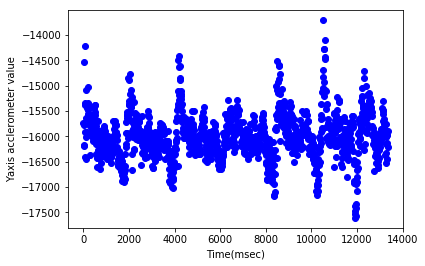

In [40]:
plt.xlabel("Time(msec)")
plt.ylabel("Yaxis acclerometer value")
plt.plot(input_cardiac_record.iloc[:,0:1], input_cardiac_record.iloc[:,2:3], 'bo')
plt.show()

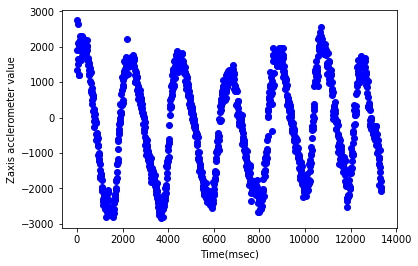

In [41]:
plt.plot(input_cardiac_record.iloc[:,0:1], input_cardiac_record.iloc[:,3:4], 'bo')
plt.xlabel("Time(msec)")
plt.ylabel("Zaxis acclerometer value")
plt.show()

In [43]:
'''Since the acclerations are provided along three axis we can compute the norm 
of the vector and use the norm for further calculations.Conputing the norm would 
help in modifying the problem statement from time domain to frequency domain.'''

'Since the acclerations are provided along three axis we can compute the norm \nof the vector and use the norm for further calculations.Conputing the norm would \nhelp in modifying the problem statement from time domain to frequency domain.'

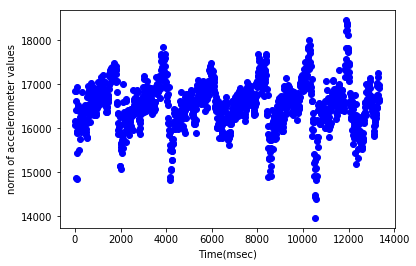

In [44]:
norm = np.linalg.norm(input_cardiac_record[['x axis','y axis','z axis']].values,axis=1)
plt.xlabel("Time(msec)")
plt.ylabel("norm of accelerometer values")
plt.plot(input_cardiac_record.iloc[:,0:1], norm, 'bo')
plt.show()

In [47]:
#Computing the Fast Fourier Transform of the norm 

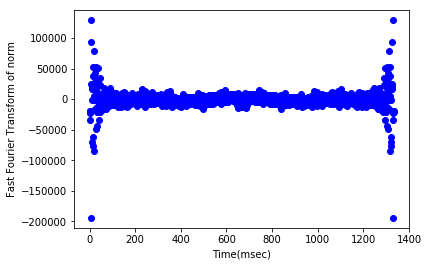

In [45]:
norm_fft = np.fft.fft(norm)
plt.xlabel("Time(msec)")
plt.ylabel("Fast Fourier Transform of norm")
plt.plot(np.real(norm_fft[1:]), 'bo')
plt.show()


In [65]:
#calculating the maximum frequency and assuming the highest frequency plot would be the person breath and not the noise.
max_idx = np.argmax(np.real(norm_fft[1:norm_fft.shape[0]//2])) + 1#ignoring the DC and calculating the maximum frequency referring ot the time domain as 'norm_fft.shape[0]//2'
Fs = 100#the sampling frequency of the data
breathing_rate = (max_idx * Fs / norm_fft.shape[0])*60
breathing_rate

31.437125748502993